Having a real estate background, i have always been interested in determining property values. with the Ames Data set from Kaggle, 
We use Machine Learning techniques to investigate this. And so goes the process 

In [1]:
#Importing the required Libraries and the train and test data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
%matplotlib inline

In [2]:
#Importing the data

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# From EDA obvious outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])


In [3]:
#looking at the train data
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#looking at the test data
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#check the numbers of samples and features for the test ad train

print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1453, 80) 
The test data size before dropping Id feature is : (1459, 79) 


In [6]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1453.000,1194.000,1453.000,1453.000,1453.000,1453.000,1453.000,1445.000,1453.000,1453.000,...,1453.000,1453.000,1453.000,1453.000,1453.000,1453.000,1453.000,1453.000,1453.000,1453.000
mean,56.965,69.776,10463.490,6.096,5.581,1971.268,1984.864,102.669,439.391,46.560,...,94.276,46.334,21.672,3.426,15.134,2.442,43.699,6.321,2007.814,181268.626
std,42.367,23.216,9875.640,1.374,1.110,30.165,20.641,179.466,433.128,161.531,...,125.442,65.391,60.768,29.387,55.882,38.275,497.308,2.696,1.330,79397.417
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7535.000,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,130000.000
50%,50.000,69.000,9477.000,6.000,5.000,1973.000,1994.000,0.000,383.000,0.000,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163500.000
75%,70.000,80.000,11600.000,7.000,6.000,2000.000,2004.000,164.000,712.000,0.000,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,2188.000,1474.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


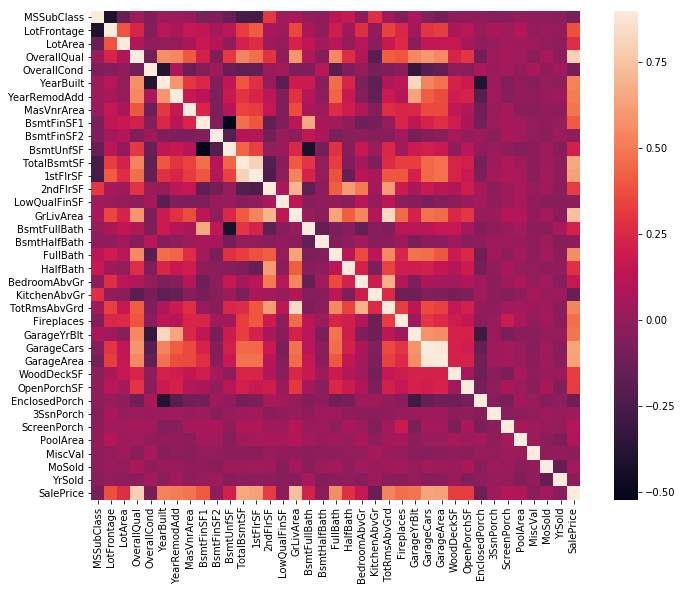

In [7]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


Looking at our dependent variable, the Sales price Skew & Kurtosis Analysis



 mu = 181268.63 and sigma = 79370.09



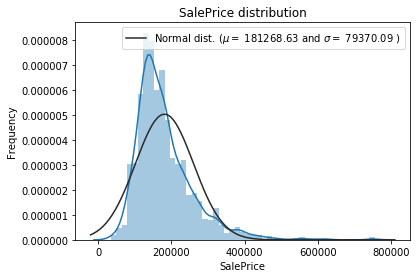

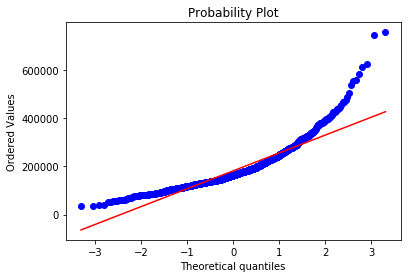

In [8]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The dependent variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

### Log-transformation of the dependent variable


 mu = 12.03 and sigma = 0.40



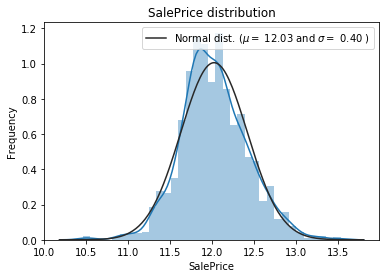

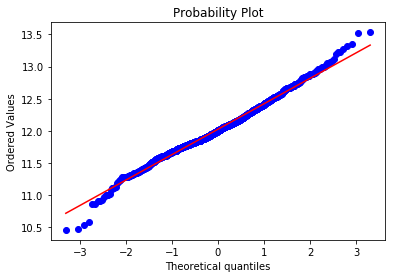

In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Checking new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# fitting parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
# Apply transformation
train.SalePrice = np.log1p(train.SalePrice )
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice

### Data Processing

In [11]:
#For this process, we combine the train and test data sets 

combined_data = pd.concat((train, test)).reset_index(drop=True)
print(combined_data.shape)


(2912, 80)


 Missing Data

In [12]:
#missing data percent plot
total = combined_data.isnull().sum().sort_values(ascending=False)
percent = (combined_data.isnull().sum()/combined_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,2903,0.997
MiscFeature,2807,0.964
Alley,2715,0.932
Fence,2344,0.805
SalePrice,1459,0.501
FireplaceQu,1418,0.487
LotFrontage,486,0.167
GarageQual,158,0.054
GarageYrBlt,158,0.054
GarageFinish,158,0.054


Dealing with Missing Data

Now that we know we have alot of missing data, we deal with it

In [13]:
#replacing missing values with None 
#we drop columns with over 80% missing data since the available information will not get us accurate information.
#looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature', 'Alley' and 'Fence' are strong
#candidates for outliers, so we'll be happy to delete them.

combined_data = combined_data.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis = 1)
combined_data.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.000,0.000,GLQ,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.000,0.000,ALQ,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.000,0.000,GLQ,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.000,0.000,ALQ,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.000,0.000,GLQ,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


In [16]:
# Replacing Nan with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu','MasVnrType','Utilities']:
   combined_data[col] = combined_data[col].fillna('None')

Numeric data

In [17]:
# Replacing missing data with 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    combined_data[col] = combined_data[col].fillna(0)

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
combined_data['LotFrontage'] = combined_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [18]:
# checking to see if there is any left missing data-1
total = combined_data.isnull().sum().sort_values(ascending=False)
percent = (combined_data.isnull().sum()/combined_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,1459,0.501
MSZoning,4,0.001
Functional,2,0.001
Exterior1st,1,0.000
Exterior2nd,1,0.000
KitchenQual,1,0.000
SaleType,1,0.000
Electrical,1,0.000
Fireplaces,0,0.000
ExterCond,0,0.000


In [19]:
#Opps! clearly we still have misisng data to fix
combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")

#'RL' is by far the most common value. So we can fill in missing values with 'RL'
combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])

In [20]:
# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

common_vars = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual','Utilities']
for var in common_vars:
    combined_data[var] = combined_data[var].fillna(combined_data[var].mode()[0])
    
    
# data description says NA means typical
combined_data['Functional'] = combined_data['Functional'].fillna('Typ')

In [21]:
# checking to see if there is any left missing data-2
total = combined_data.isnull().sum().sort_values(ascending=False)
percent = (combined_data.isnull().sum()/combined_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SalePrice,1459,0.501
YrSold,0,0.000
ExterCond,0,0.000
ExterQual,0,0.000
Exterior1st,0,0.000
Exterior2nd,0,0.000
FireplaceQu,0,0.000
Fireplaces,0,0.000
Foundation,0,0.000
FullBath,0,0.000


### Numerical and Categorical Data

In [22]:
# Differentiate numerical features (minus the target) and categorical features
categorical_vars = combined_data.select_dtypes(include=['object']).columns
print(categorical_vars)

numerical_vars = combined_data.select_dtypes(exclude = ["object"]).columns
print(numerical_vars)

print("Numerical vars : " + str(len(numerical_vars)))
print("Categorical vars : " + str(len(categorical_vars)))

num_vars = combined_data[numerical_vars]
cat_vars = combined_data[categorical_vars]


Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold',

In [23]:
num_vars.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.000,0.000,1.000,0.000,150.000,0,...,7,0,2.584,0,8,856.000,0,2003,2003,2008
1,1262,0,0,3,978.000,0.000,0.000,1.000,284.000,0,...,6,0,2.573,0,6,1262.000,298,1976,1976,2007
2,920,866,0,3,486.000,0.000,1.000,0.000,434.000,0,...,7,0,2.589,0,6,920.000,0,2001,2002,2008
3,961,756,0,3,216.000,0.000,1.000,0.000,540.000,272,...,7,0,2.553,0,7,756.000,0,1915,1970,2006
4,1145,1053,0,4,655.000,0.000,1.000,0.000,490.000,0,...,8,0,2.597,0,9,1145.000,192,2000,2000,2008


In [25]:
# Plot skew value for each numerical value
from scipy.stats import skew 
skewness = num_vars.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal         21.921
PoolArea        17.673
LotArea         13.099
LowQualFinSF    12.392
3SsnPorch       11.362
KitchenAbvGr     4.296
BsmtFinSF2       4.146
EnclosedPorch    4.030
ScreenPorch      3.941
BsmtHalfBath     3.926
MasVnrArea       2.625
OpenPorchSF      2.527
WoodDeckSF       1.844
MSSubClass       1.374
1stFlrSF         1.259
LotFrontage      1.105
GrLivArea        1.068
BsmtFinSF1       0.981
BsmtUnfSF        0.920
2ndFlrSF         0.860
TotRmsAbvGrd     0.748
Fireplaces       0.726
HalfBath         0.694
TotalBsmtSF      0.672
BsmtFullBath     0.620
OverallCond      0.579
BedroomAbvGr     0.326
GarageArea       0.218
MoSold           0.197
OverallQual      0.192
FullBath         0.165
YrSold           0.134
GarageCars      -0.219
YearRemodAdd    -0.452
YearBuilt       -0.600
GarageYrBlt     -3.915
SalePrice          nan
dtype: float64

In [27]:
#Encode categorial features: can and should be replaced.

skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    num_vars[feat] = boxcox1p(num_vars[feat], boxcox_normmax(num_vars[feat] + 1))
    combined_data[feat] = boxcox1p(combined_data[feat], boxcox_normmax(combined_data[feat] + 1))
    
    
from scipy.stats import skew 
skewness.sort_values(ascending=False)

There are 28 skewed numerical features to Box Cox transform
Mean skewnees: 3.9597020927129796


C:\Users\angella.LABOREMUS\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3035: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my
C:\Users\angella.LABOREMUS\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:5833: RuntimeWarning: overflow encountered in multiply
  return np.sum(a*a, axis)


MiscVal         21.921
PoolArea        17.673
LotArea         13.099
LowQualFinSF    12.392
3SsnPorch       11.362
KitchenAbvGr     4.296
BsmtFinSF2       4.146
EnclosedPorch    4.030
ScreenPorch      3.941
BsmtHalfBath     3.926
MasVnrArea       2.625
OpenPorchSF      2.527
WoodDeckSF       1.844
MSSubClass       1.374
1stFlrSF         1.259
LotFrontage      1.105
GrLivArea        1.068
BsmtFinSF1       0.981
BsmtUnfSF        0.920
2ndFlrSF         0.860
TotRmsAbvGrd     0.748
Fireplaces       0.726
HalfBath         0.694
TotalBsmtSF      0.672
BsmtFullBath     0.620
OverallCond      0.579
YearBuilt       -0.600
GarageYrBlt     -3.915
dtype: float64

In [28]:
skewness = num_vars.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))
skewness.sort_values(ascending=False)

There are 17 skewed numerical features after Box Cox transform
Mean skewnees: 3.502390979027279


PoolArea        15.576
3SsnPorch        8.841
LowQualFinSF     8.590
MiscVal          5.231
KitchenAbvGr     3.782
BsmtHalfBath     3.776
ScreenPorch      3.149
BsmtFinSF2       2.570
EnclosedPorch    2.151
MasVnrArea       0.973
2ndFlrSF         0.894
WoodDeckSF       0.784
HalfBath         0.730
GarageYrBlt      0.704
OpenPorchSF      0.621
BsmtFullBath     0.614
Fireplaces       0.554
dtype: float64

### Adding Features

In [29]:
#  Adding total sqfootage feature 
combined_data['TotalSF']=combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']

# Adding total bathrooms feature
combined_data['Total_Bathrooms'] = (combined_data['FullBath'] + (0.5 * combined_data['HalfBath']) +
                               combined_data['BsmtFullBath'] + (0.5 * combined_data['BsmtHalfBath']))

#  Adding total porch sqfootage feature
combined_data['Total_porch_sf'] = (combined_data['OpenPorchSF'] + combined_data['3SsnPorch'] +
                              combined_data['EnclosedPorch'] + combined_data['ScreenPorch'] +
                              combined_data['WoodDeckSF'])


### Deleting features

Features that cant be skewd or are unsignificant.

In [30]:
combined_data['haspool'] = combined_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined_data['hasgarage'] = combined_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined_data['hasbsmt'] = combined_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined_data['hasfireplace'] = combined_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Not normaly distributed can not be normalised and has no central tendecy
combined_data = combined_data.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)

Getting new train and test data sets

In [31]:
train = combined_data.iloc[:len(y_train), :]
test = combined_data.iloc[len(y_train):, :]
print(['Train data shpe: ',train.shape,'Prediction on (Sales price) shape: ', y_train.shape,'Test shape: ', test.shape])

['Train data shpe: ', (1453, 78), 'Prediction on (Sales price) shape: ', (1453,), 'Test shape: ', (1459, 78)]


## Plotting the data

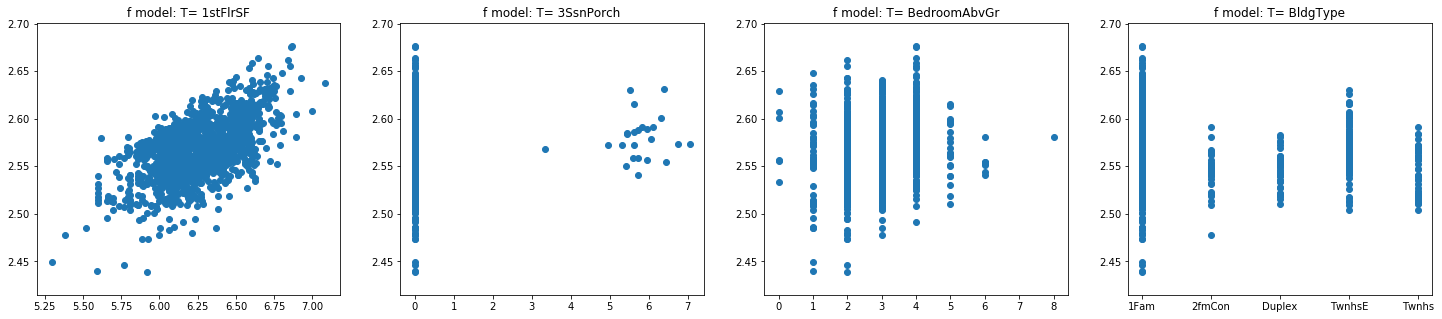

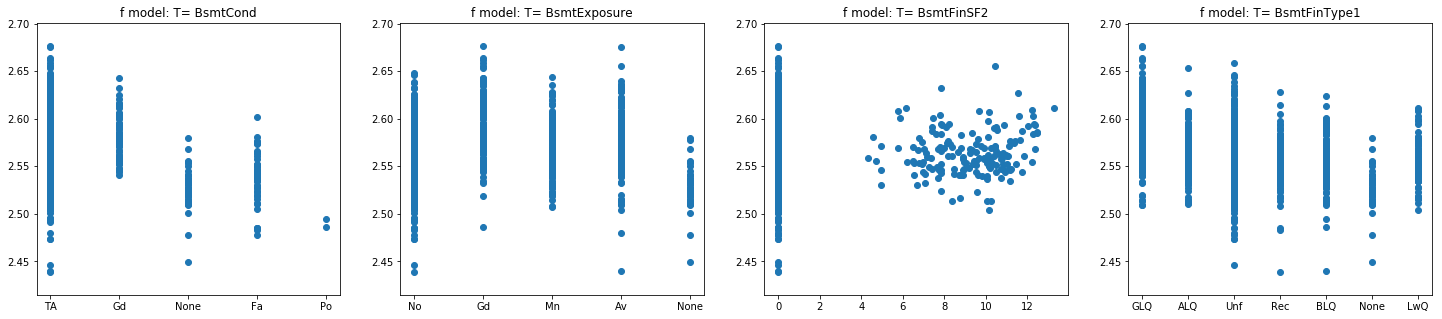

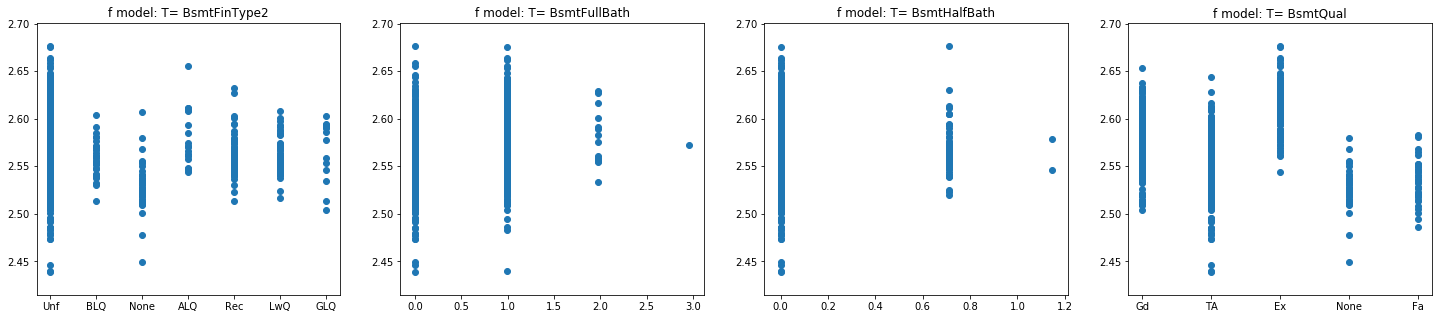

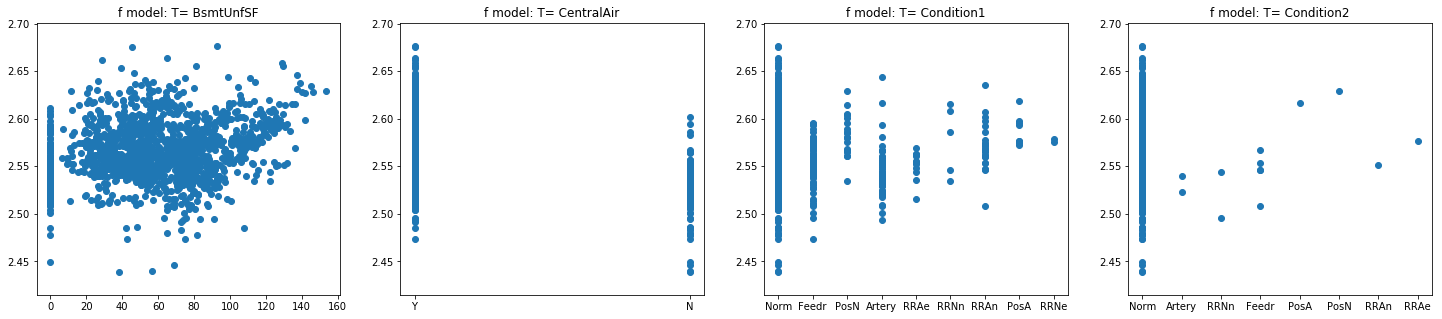

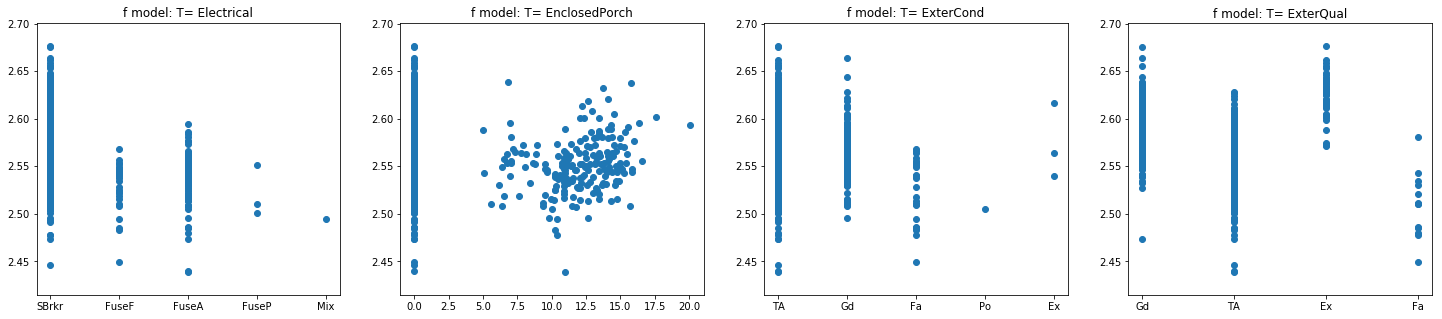

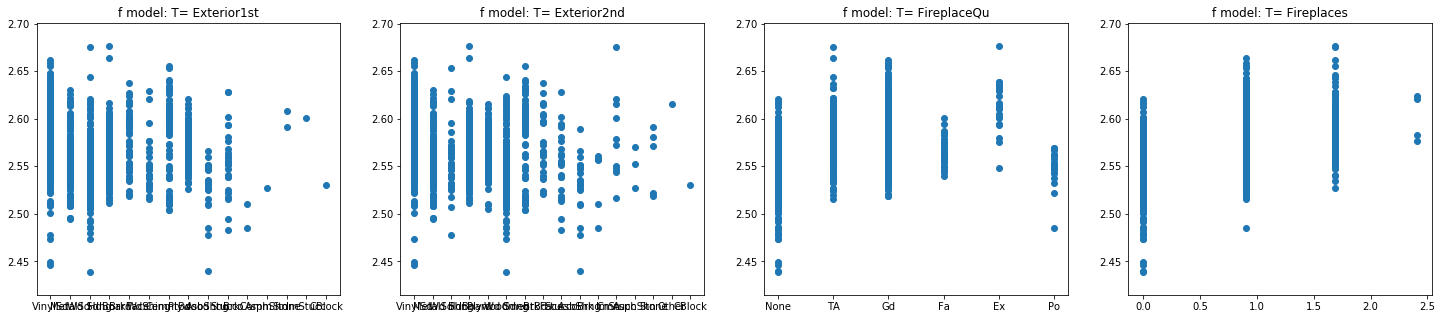

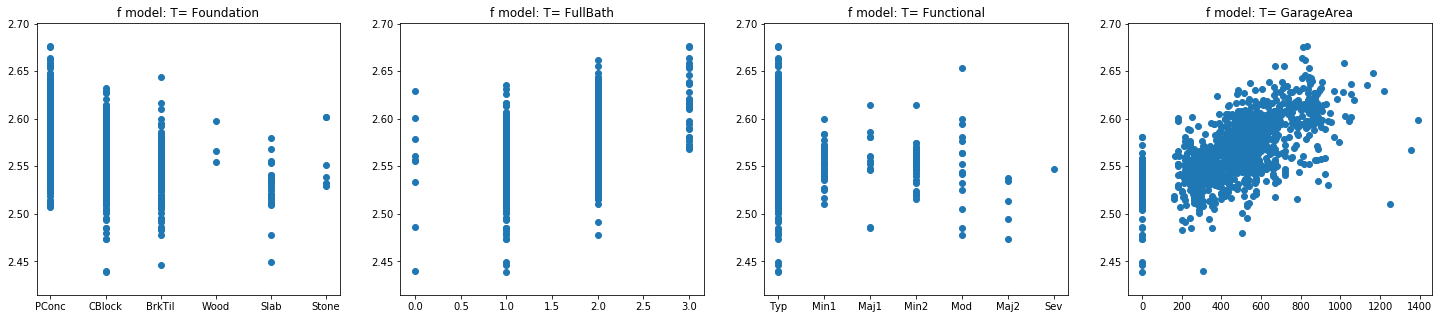

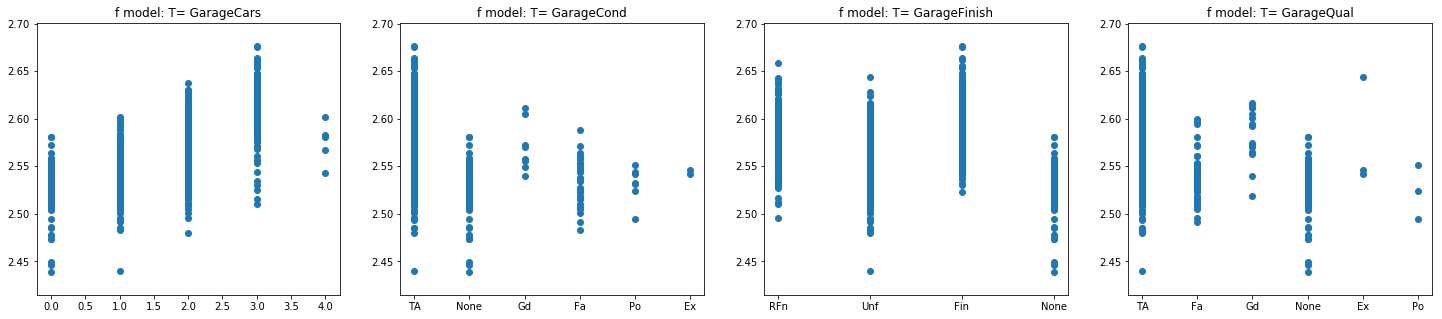

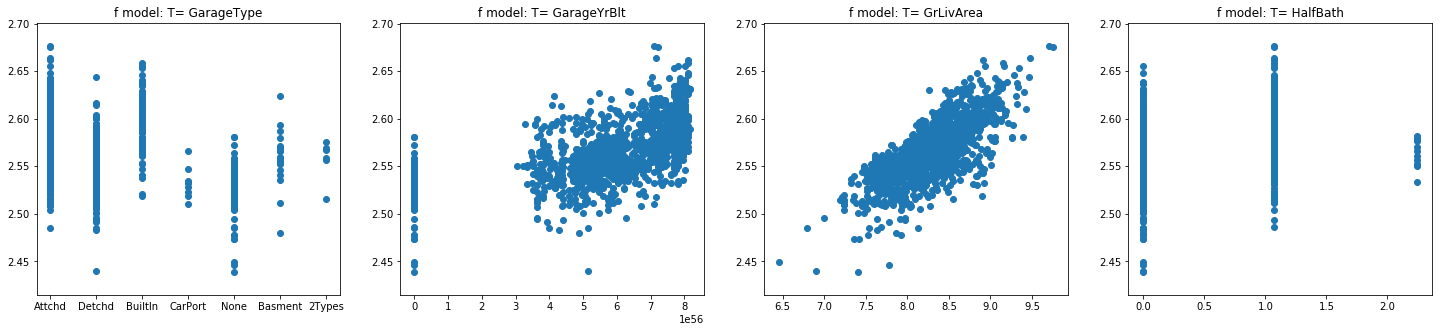

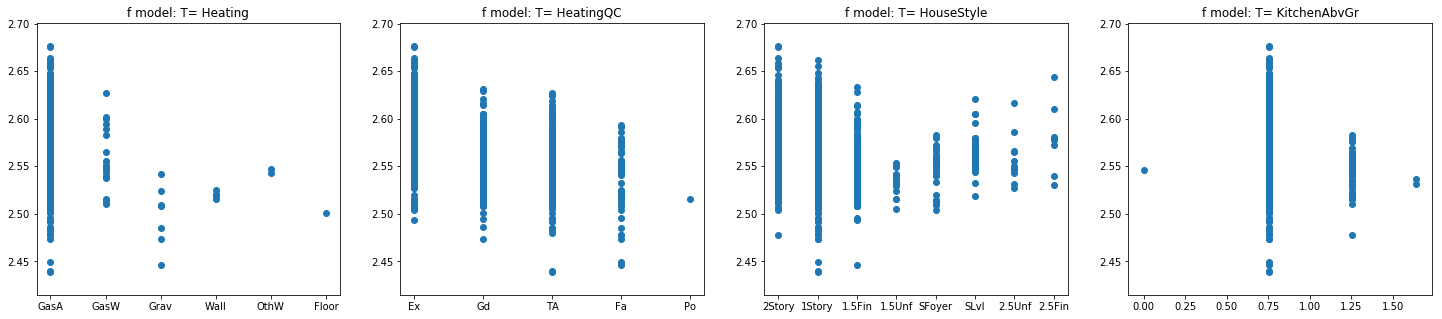

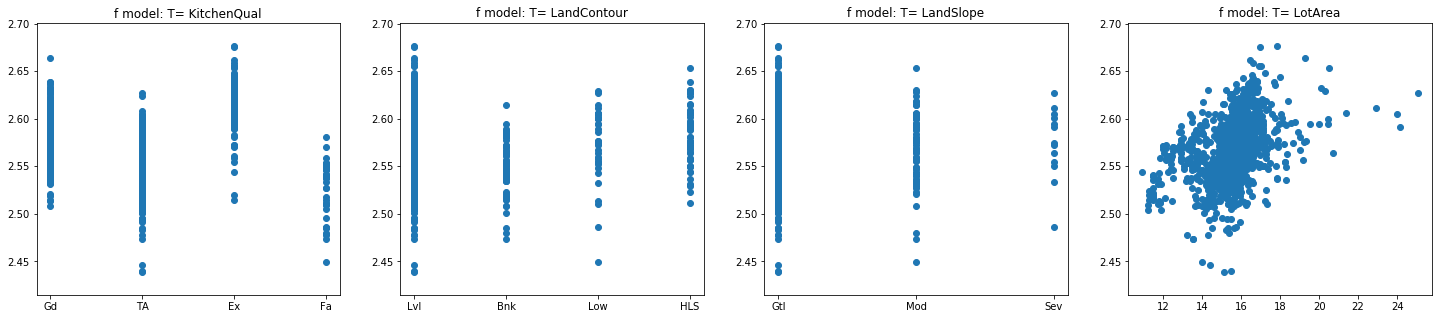

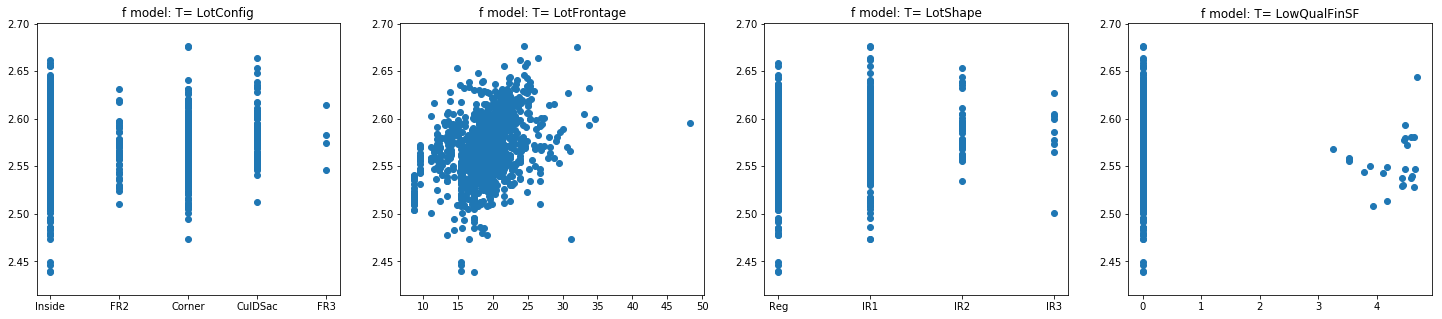

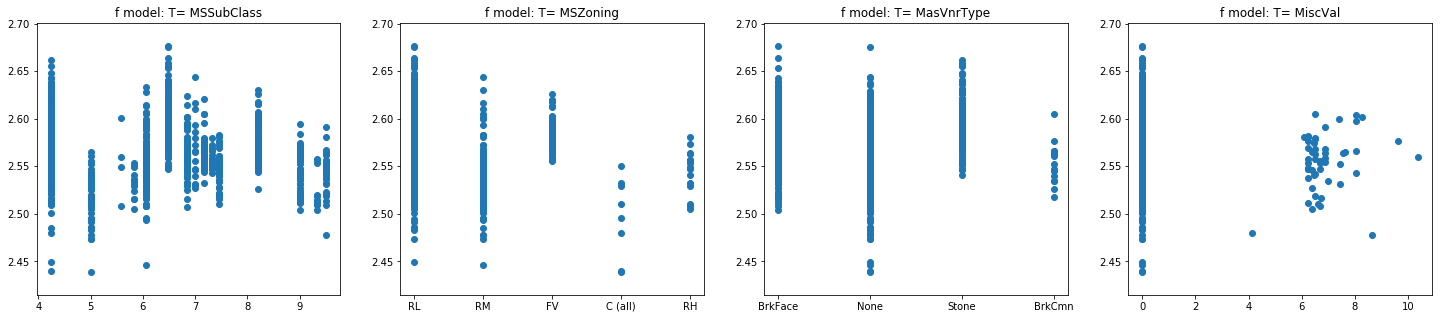

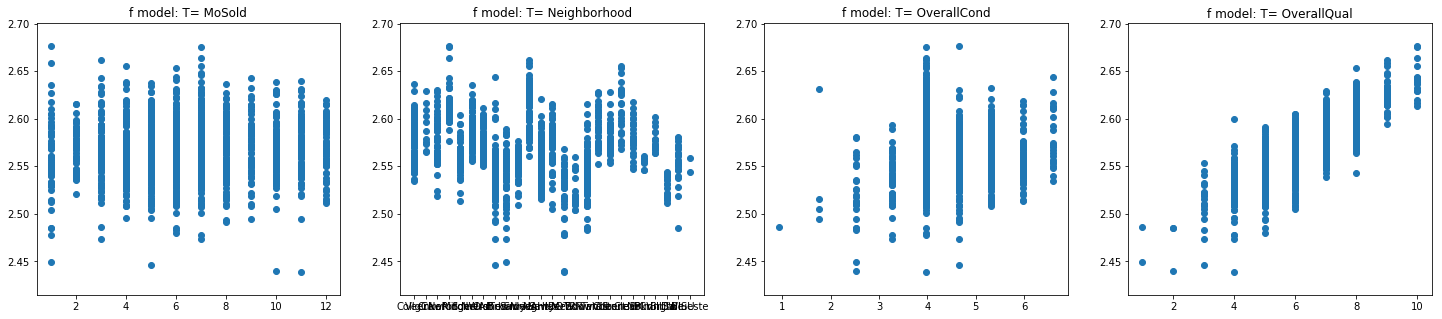

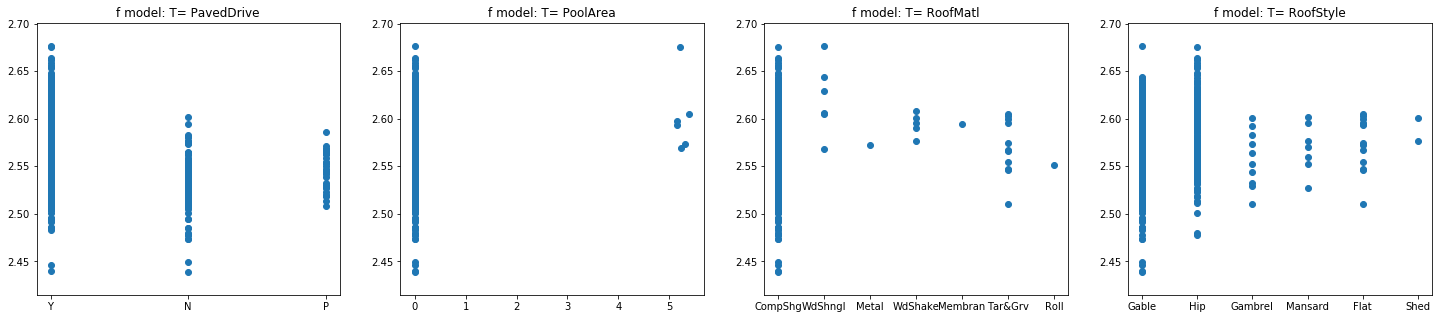

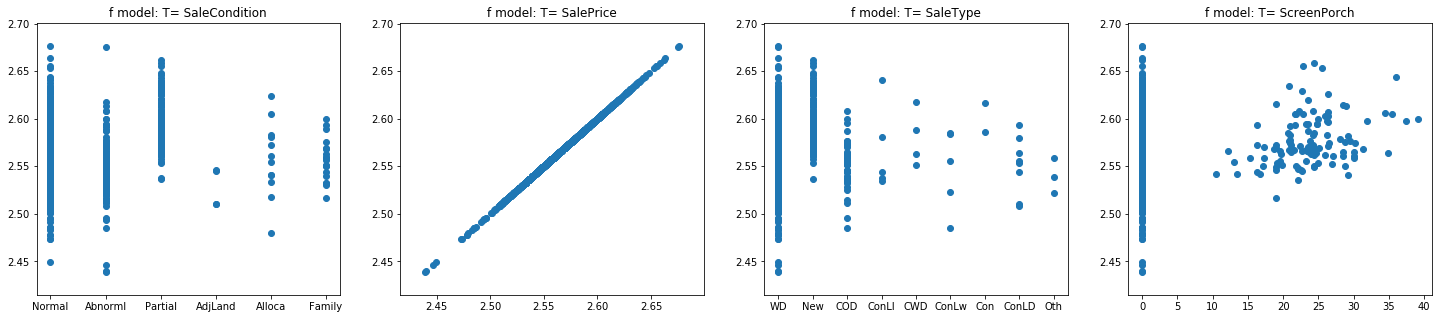

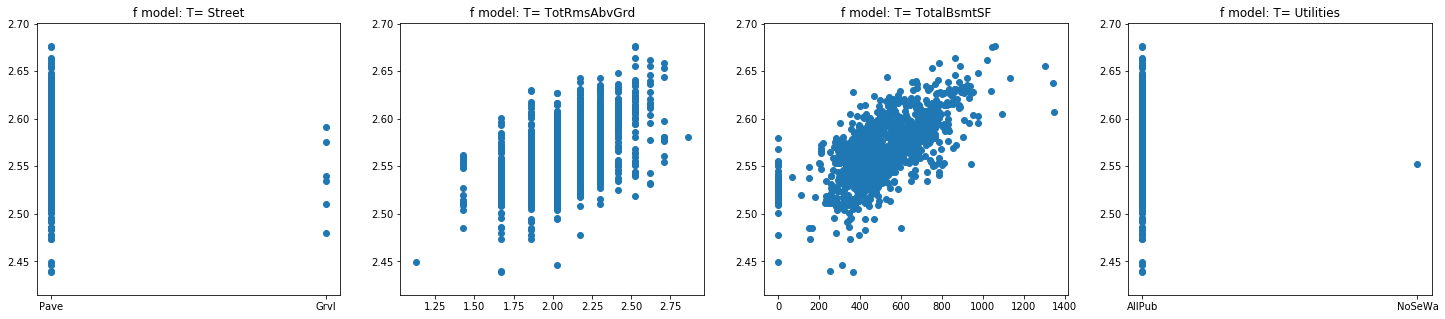

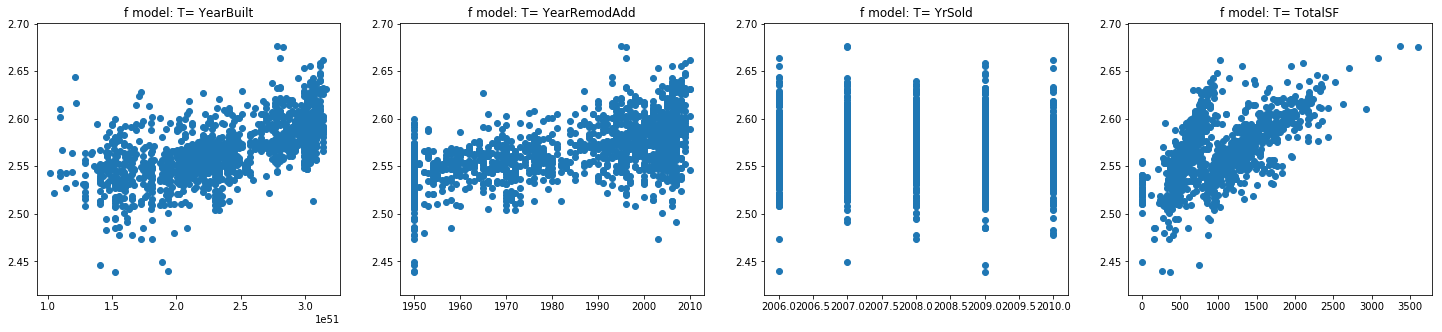

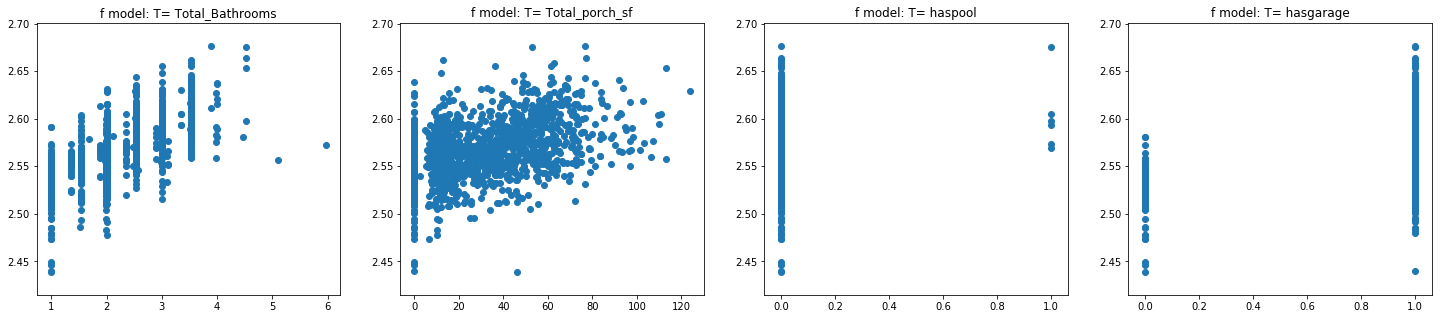

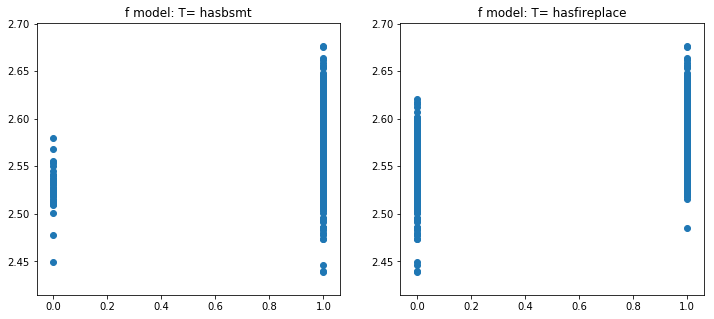

In [32]:
#One can observe the behaviour of the variables, locate outlier and more.
vars = combined_data.columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = y_train
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

In [33]:
# Removes outliers 
# outliers = [30, 88, 462, 631, 1322]
# train = train.drop(train.index[outliers])
y_train = train['SalePrice']

In [34]:
#creating dummies for categorical variables and 

combined_data = combined_data.drop("SalePrice", axis = 1)
new_data = pd.get_dummies(combined_data)

print(new_data.shape)
X = new_data.iloc[:len(y), :]
X_test = new_data.iloc[len(y):, :]
X.shape, y_train.shape, X_test.shape


print(X.shape,y_train.shape,X_test.shape)

(2912, 287)
(1453, 287) (1453,) (1459, 287)


In [35]:
#Remove over fitting
# Removes columns where the threshold of zero's is (> 99.95), means has only zero values 

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

print(X.shape,y_train.shape,X_test.shape)

(1453, 285) (1453,) (1459, 285)


## Modeling

### Import Libraries

In [40]:
git clone https://github.com/dmlc/xgboost.git

SyntaxError: invalid syntax (<ipython-input-40-9bf9e7e5c282>, line 1)

In [38]:
cd xgboost; make; cd python-package; python setup.py install

[WinError 2] The system cannot find the file specified: 'xgboost; make; cd python-package; python setup.py install'
C:\Users\angella.LABOREMUS


In [37]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Defining folds and score functions

kfolds = KFold(n_splits=18, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=9000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

# xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)



# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]




# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)


svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm,
          'Svd': svr}
#           'xgboost': xgboost}
predictions = {}
scores = {}

## Training the models

In [ ]:
for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())


### Validating and trainig each model

In [ ]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['svr'] = (score.mean(), score.std())

# score = cv_rmse(xgboost)
# print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('xgboost')
# xgb_model_full_data = xgboost.fit(X, y)


print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

#### Blend model prediction


In [ ]:
def blend_models_predict(X):
    return ((0.16  * elastic_model.predict(X)) + \
            (0.16 * lasso_model.predict(X)) + \
            (0.11 * ridge_model.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * xgb_model_full_data.predict(X)) + \
            (0.27 * stack_gen_model.predict(np.array(X))))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

## Submission


In [ ]:
print('Predict submission')
submission = pd.read_csv("../input/sample_submission.csv")
submission.iloc[:,1] = (np.expm1(blend_models_predict(X_test)))